<a href="https://colab.research.google.com/github/Anisha-Tasneem/CSE499/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/499B-datasets/DatasetNew.csv')

# Drop irrelevant columns
data = data.drop(columns=['Customer ID', 'Age', 'City Code'])

# Convert categorical variables like Gender to numerical values
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

# Normalize the data
scaler = MinMaxScaler()
data[['Product Code','Product Price (Taka)', 'Delivery Charge(Taka)','Total Bill (Taka)', 'Spending Score']] = scaler.fit_transform(data[['Product Code','Product Price (Taka)', 'Delivery Charge(Taka)', 'Total Bill (Taka)', 'Spending Score']])
# Split data into features and target
X = data.drop(columns=['Customer Value'])
y = data['Customer Value']
# Convert dataframe to numpy arrays
X = X.to_numpy()
y = y.to_numpy()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape data for RNN input (samples, timesteps, features)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Print shapes to verify
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (4000, 1, 6)
X_test shape: (1000, 1, 6)
y_train shape: (4000,)
y_test shape: (1000,)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import mean_absolute_error

# Define the RNN model
model = Sequential([
    SimpleRNN(units=64, input_shape=(1, 6), activation='relu'),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Predict customer values for the test set
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Test Accuracy:", mae)

Epoch 1/50
125/125 [==============================] - 1s 5ms/step - loss: 0.2414 - val_loss: 0.0488
Epoch 2/50
125/125 [==============================] - 0s 3ms/step - loss: 0.0375 - val_loss: 0.0321
Epoch 3/50
125/125 [==============================] - 0s 3ms/step - loss: 0.0232 - val_loss: 0.0179
Epoch 4/50
125/125 [==============================] - 0s 3ms/step - loss: 0.0120 - val_loss: 0.0095
Epoch 5/50
125/125 [==============================] - 0s 3ms/step - loss: 0.0062 - val_loss: 0.0051
Epoch 6/50
125/125 [==============================] - 0s 3ms/step - loss: 0.0035 - val_loss: 0.0031
Epoch 7/50
125/125 [==============================] - 0s 4ms/step - loss: 0.0024 - val_loss: 0.0024
Epoch 8/50
125/125 [==============================] - 1s 4ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 9/50
125/125 [==============================] - 1s 4ms/step - loss: 0.0016 - val_loss: 0.0019
Epoch 10/50
125/125 [==============================] - 0s 4ms/step - loss: 0.0015 - val_loss: 0.0016

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, SimpleRNN, Dense

# Define input and output sequence lengths
input_seq_length = 10
output_seq_length = 10
input_dim = 4  # Number of features for each element in the input sequence
output_dim = 4  # Number of features for each element in the output sequence

# Define the encoder
encoder_input = Input(shape=(input_seq_length, input_dim))
encoder_rnn = SimpleRNN(units=64, return_state=True)
encoder_outputs, encoder_state = encoder_rnn(encoder_input)

# Define the decoder
decoder_input = Input(shape=(output_seq_length, output_dim))
decoder_rnn = SimpleRNN(units=64, return_sequences=True)
decoder_outputs = decoder_rnn(decoder_input, initial_state=encoder_state)
decoder_dense = Dense(output_dim, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model
model = Model([encoder_input, decoder_input], decoder_outputs)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy')

# Print model summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 10, 4)]              0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 10, 4)]              0         []                            
                                                                                                  
 simple_rnn_7 (SimpleRNN)    [(None, 64),                 4416      ['input_1[0][0]']             
                              (None, 64)]                                                         
                                                                                                  
 simple_rnn_8 (SimpleRNN)    (None, 10, 64)               4416      ['input_2[0][0]',         

In [ ]:
from sklearn.metrics import classification_report

# Binarize predictions and true values
threshold = 0.5  # Adjust as needed

x_pred_binary = (y_pred > threshold).astype(int)
x_test_binary = (y_test > threshold).astype(int)

y_pred_binary = (y_pred > threshold).astype(int)
y_test_binary = (y_test > threshold).astype(int)

# Print classification report
print(classification_report(y_test_binary, y_pred_binary))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       520
           1       1.00      1.00      1.00       480

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



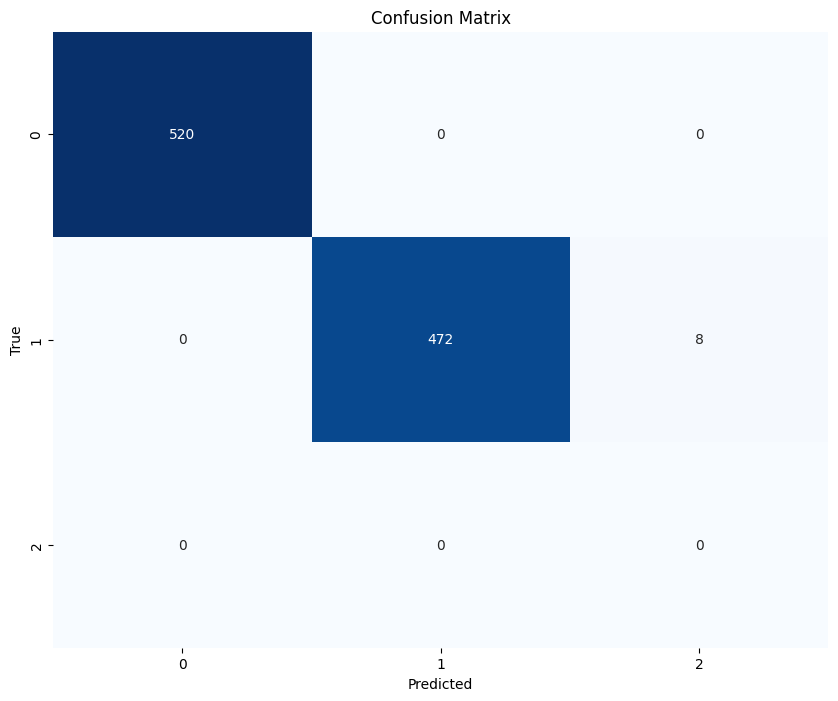

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define the number of bins
num_bins = 10

# Create bins based on the range of values
bin_edges = np.linspace(min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max()), num_bins + 1)

# Digitize predictions and true values based on the bin edges
y_pred_bins = np.digitize(y_pred, bin_edges)
y_test_bins = np.digitize(y_test, bin_edges)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test_bins, y_pred_bins)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

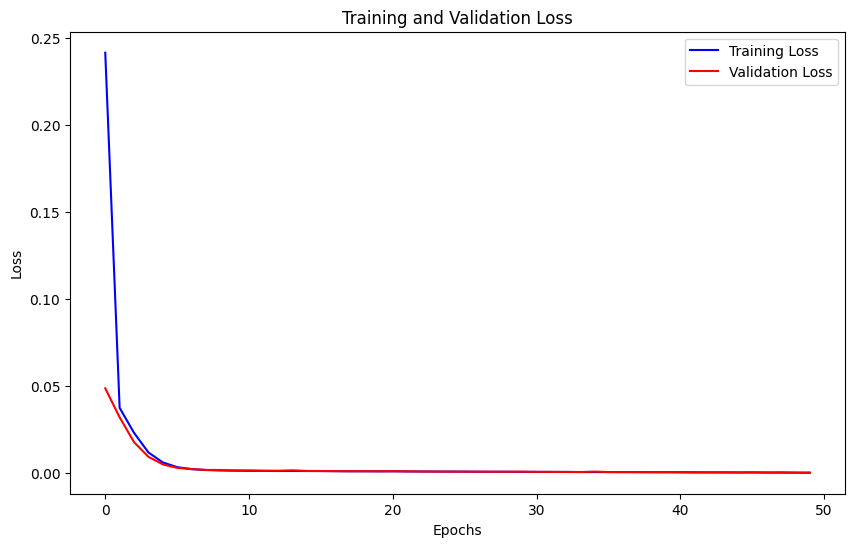

In [ ]:
# Check if history is not None
if history is not None:
    # Extract training loss and validation loss from the history object
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Create a plot
    plt.figure(figsize=(10, 6))

    # Plot training and validation loss
    plt.plot(train_loss, label='Training Loss', color='blue')
    plt.plot(val_loss, label='Validation Loss', color='red')

    # Add title and labels
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')

    # Add legend
    plt.legend()

    # Show plot
    plt.show()
else:
    print("Training history is not available.")